# Machine Learning Engineer Nanodegree
## Supervised Learning
## Capstone Project: Predicting Honey Production

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR

%matplotlib inline

#Read in the Data File
df = pd.read_csv('vHoneyNeonic_v03.csv')

print("The Honey Production Neonic Pesticide dataset has {} data points with {} variables each.".format(*df.shape))


The Honey Production Neonic Pesticide dataset has 1132 data points with 17 variables each.


In [2]:
#Take a look at the first several rows of data
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
3,AL,18000.0,50,900000.0,99000.0,0.52,468000.0,1994,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,19000.0,45,855000.0,103000.0,0.59,504000.0,1993,Alabama,South,1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Display a description of the dataset
display(df.describe())

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1132.000000,1.132000e+03,1132.000000,1132.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,62452.296820,61.809187,4.317093e+06,1.202020e+06,1.485928,4.932350e+06,2003.698763,30.275618,9260.332067,8944.121564,5293.034749,619.875642,102.432291,24219.796313
std,90698.022209,20.701807,6.962385e+06,2.026242e+06,0.966583,8.551674e+06,7.783332,15.586671,27769.597206,16378.524006,9697.447417,2387.930400,430.409906,47179.176730
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.460000,8.900000e+04,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,47.000000,5.192500e+05,1.280000e+05,0.750000,8.137500e+05,1997.000000,18.000000,0.000000,617.250000,0.000000,0.000000,0.000000,923.450000
50%,27000.000000,60.000000,1.607500e+06,4.110000e+05,1.260000,1.936000e+06,2003.000000,30.000000,33.400000,3186.600000,463.200000,0.000000,0.000000,5151.400000
75%,69250.000000,74.000000,4.325000e+06,1.377000e+06,1.920000,4.842500e+06,2010.000000,42.750000,4345.150000,9373.400000,5724.000000,202.600000,0.000000,26130.900000
max,520000.000000,177.000000,4.641000e+07,1.380000e+07,7.860000,8.385900e+07,2017.000000,56.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [4]:
#Summarize the data by year
year_summary = df[['year','numcol','yieldpercol','nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID','nAllNeonic']].groupby('year').sum()
year_summary.reset_index(level=0,inplace=True)
year_summary.sort_values(by='yieldpercol',ascending=False,inplace=True)
year_summary.head()

,year,numcol,yieldpercol,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
5,1996,2558000.0,3083,0.0,101002.5,0.0,0.0,0.0,101002.5
7,1998,2621000.0,3008,0.0,166324.4,0.0,0.0,0.0,166324.4
2,1993,2868000.0,2995,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,2764000.0,2976,0.0,11207.2,0.0,0.0,0.0,11207.2
6,1997,2617000.0,2965,0.0,185898.7,0.0,0.0,0.0,185898.7


Text(0,0.5,'Kg of Pesticide Applied')

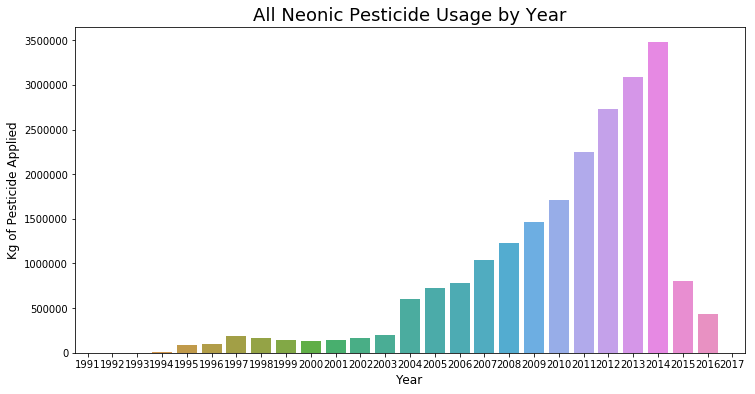

In [5]:
#Graph pesticide usage by year
plt.figure(figsize=(12,6))
sns.barplot(x='year',y='nAllNeonic',data=year_summary)
plt.title('All Neonic Pesticide Usage by Year', fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Kg of Pesticide Applied", fontsize=12)

In [6]:
#Inferences from the data indicate neonic pesticide usage occurred only between 2004 and 2014
#drop the data prior to 2004 and after 2014
df = df[(df['year'] >=2004) & (df['year'] <= 2014)]

In [7]:
#Summarize the data by state
state_summary = df[['state','numcol','yieldpercol','nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID','nAllNeonic']].groupby('state').sum()
state_summary.reset_index(level=0,inplace=True)
state_summary.sort_values(by='state',ascending=True,inplace=True)

Text(0,0.5,'Kg of Pesticide Applied')

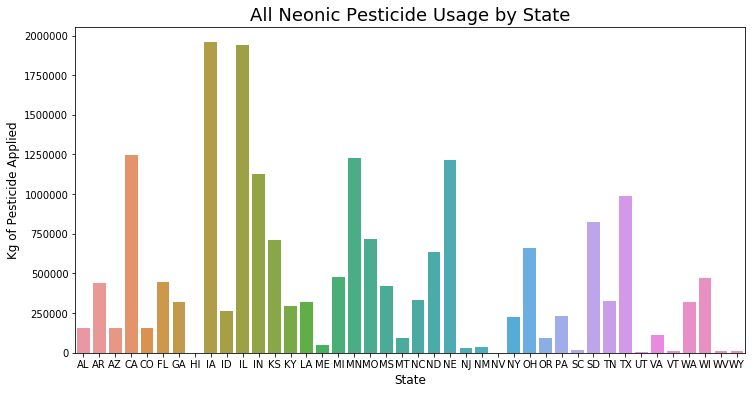

In [8]:
#Graph pesticide usage by state
plt.figure(figsize=(12,6))
sns.barplot(x='state',y='nAllNeonic',data=state_summary)
plt.title('All Neonic Pesticide Usage by State', fontsize=18)
plt.xlabel("State", fontsize=12)
plt.ylabel("Kg of Pesticide Applied", fontsize=12)

In [9]:
#Print the state summary data
from IPython.core.display import HTML
display(HTML(state_summary.to_html()))

,state,numcol,yieldpercol,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,105000.0,660,50024.1,50809.6,55926.1,0.0,0.0,156759.8
1,AR,303000.0,726,58152.5,128899.8,237458.9,16131.2,0.0,440642.4
2,AZ,297000.0,601,9008.4,122748.4,8579.9,17391.4,0.0,157728.1
3,CA,3985000.0,518,34359.1,958997.7,71839.3,183742.8,85.9,1249024.8
4,CO,316000.0,613,92480.9,25796.8,37270.6,12.2,0.0,155560.5
5,FL,2053000.0,798,2803.2,374012.9,64010.3,3442.6,0.0,444269.0
6,GA,694000.0,594,32854.0,162553.4,123890.7,299.5,116.0,319713.6
7,HI,114000.0,999,0.0,0.0,0.0,0.0,0.0,0.0
8,IA,328000.0,687,1180073.2,345565.1,432240.3,114.3,0.0,1957992.9
9,ID,1034000.0,432,23900.5,198049.0,41297.3,1037.4,259.8,264544.0


In [10]:
#Create three datasets to use for model performance determination by droping data for states where > 90% 
#of the data are missing for a particular pesticide usage
#Inferences HI has no pesticide data
excludeHI_data=df[(df['state'] != 'HI')]
excludeHI_data=excludeHI_data[(excludeHI_data['state'] != 'SC')] #only has one row
#AL, CO, SD, ND, HI, NE, WY no data for 'nACETAMIPRID'
nACETAMIPRID_data=df[(df['state'] != 'AL')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'CO')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'SC')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'SD')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'ND')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'HI')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'NE')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'KS')]
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] != 'WY')]
# AL,WI,UT,TX,SD,SC,NV,NM,NE,ND,MS,MN,ME,LA,MT,WY,AR,AZ,IA,CO,HI,FL,CA,IL,KY,MO no data for 'nTHIACLOPRID' 
nTHIACLOPRID_data=df[(df['state'] != 'AL')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'AL')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'WI')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'UT')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'TX')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'SD')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'SC')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'NV')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'NM')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'NE')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'ND')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'MS')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'MN')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'ME')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'LA')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'MT')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'WY')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'AR')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'AZ')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'IA')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'CO')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'HI')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'FL')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'CA')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'IL')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'KY')]
nTHIACLOPRID_data=nTHIACLOPRID_data[(nTHIACLOPRID_data['state'] != 'MO')]


excludeHI_data = excludeHI_data.sort_values(by=['state', 'year'])
nACETAMIPRID_data = nACETAMIPRID_data.sort_values(by=['state', 'year'])
nTHIACLOPRID_data = nTHIACLOPRID_data.sort_values(by=['state', 'year'])

#filtered_year_summary.to_csv('out.csv')

In [11]:
#Drop unecessary features from the excludeHI_data dataset
excludeHI_data.drop('totalprod', inplace=True, axis=1)
excludeHI_data.drop('stocks', inplace=True, axis=1)
excludeHI_data.drop('priceperlb', inplace=True, axis=1)
excludeHI_data.drop('prodvalue', inplace=True, axis=1)
excludeHI_data.drop('StateName', inplace=True, axis=1)
excludeHI_data.drop('Region', inplace=True, axis=1)
excludeHI_data.drop('FIPS', inplace=True, axis=1)
excludeHI_data.drop('nACETAMIPRID', inplace=True, axis=1)
excludeHI_data.drop('nTHIACLOPRID', inplace=True, axis=1)
excludeHI_data.drop('nAllNeonic', inplace=True, axis=1)

# Display a description of the dataset
display(excludeHI_data.describe())

,numcol,yieldpercol,year,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,63358.796296,57.557870,2008.944444,18710.283333,14001.799074,10230.031481
std,95033.995463,17.366431,3.159586,37123.910245,19719.755599,11924.701373
min,3000.000000,23.000000,2004.000000,0.000000,12.300000,0.900000
25%,9000.000000,44.750000,2006.000000,694.225000,2586.875000,1152.100000
50%,27500.000000,55.000000,2009.000000,4404.400000,6882.550000,5465.200000
75%,65000.000000,67.000000,2012.000000,18638.650000,17030.075000,15540.350000
max,510000.000000,118.000000,2014.000000,278498.800000,134904.200000,64834.600000


In [12]:
#display the excludeHI_data dataset
display(HTML(excludeHI_data.to_html()))

,state,numcol,yieldpercol,year,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM
10,AL,12000.0,87,2004,2676.4,1323.9,3863.9
11,AL,13000.0,66,2005,1503.6,994.5,5493.9
8,AL,11000.0,72,2006,680.0,4230.2,5371.6
7,AL,11000.0,56,2007,7696.2,3258.1,4149.6
26,AL,9000.0,66,2008,1598.3,3296.6,4214.5
24,AL,9000.0,50,2009,5087.2,3991.9,4076.2
25,AL,9000.0,54,2010,1914.0,1757.0,4658.3
23,AL,9000.0,50,2011,10106.1,5229.8,7148.1
22,AL,8000.0,54,2012,4797.8,6249.1,7002.6
20,AL,7000.0,52,2013,5992.9,8284.4,5202.0


In [13]:
#Drop unecessary features from the nACETAMIPRID_data dataset
nACETAMIPRID_data.drop('totalprod', inplace=True, axis=1)
nACETAMIPRID_data.drop('stocks', inplace=True, axis=1)
nACETAMIPRID_data.drop('priceperlb', inplace=True, axis=1)
nACETAMIPRID_data.drop('prodvalue', inplace=True, axis=1)
nACETAMIPRID_data.drop('StateName', inplace=True, axis=1)
nACETAMIPRID_data.drop('Region', inplace=True, axis=1)
nACETAMIPRID_data.drop('FIPS', inplace=True, axis=1)
nACETAMIPRID_data.drop('nCLOTHIANIDIN', inplace=True, axis=1)
nACETAMIPRID_data.drop('nIMIDACLOPRID', inplace=True, axis=1)
nACETAMIPRID_data.drop('nTHIAMETHOXAM', inplace=True, axis=1)
nACETAMIPRID_data.drop('nTHIACLOPRID', inplace=True, axis=1)
nACETAMIPRID_data.drop('nAllNeonic', inplace=True, axis=1)

# Display a description of the dataset
display(nACETAMIPRID_data.describe())

,numcol,yieldpercol,year,nACETAMIPRID
count,355.000000,355.000000,355.000000,355.00000
mean,51771.830986,56.163380,2008.932394,1264.94338
std,71666.295853,17.553029,3.158871,3346.33873
min,3000.000000,23.000000,2004.000000,0.00000
25%,8000.000000,43.000000,2006.000000,37.65000
50%,25000.000000,54.000000,2009.000000,207.70000
75%,64000.000000,65.000000,2012.000000,848.05000
max,410000.000000,118.000000,2014.000000,36480.30000


In [14]:
#display the nACETAMIPRID_data dataset
display(HTML(nACETAMIPRID_data.to_html()))

,state,numcol,yieldpercol,year,nACETAMIPRID
47,AR,40000.0,57,2004,3312.4
46,AR,36000.0,69,2005,981.2
45,AR,32000.0,76,2006,4686.6
43,AR,28000.0,80,2007,1277.4
42,AR,28000.0,75,2008,995.7
37,AR,24000.0,57,2009,349.1
40,AR,25000.0,60,2010,902.7
36,AR,22000.0,64,2011,2874.3
41,AR,25000.0,63,2012,59.7
35,AR,22000.0,60,2013,0.0


In [15]:
#Drop unecessary features from the nTHIACLOPRID_data dataset
nTHIACLOPRID_data.drop('totalprod', inplace=True, axis=1)
nTHIACLOPRID_data.drop('stocks', inplace=True, axis=1)
nTHIACLOPRID_data.drop('priceperlb', inplace=True, axis=1)
nTHIACLOPRID_data.drop('prodvalue', inplace=True, axis=1)
nTHIACLOPRID_data.drop('StateName', inplace=True, axis=1)
nTHIACLOPRID_data.drop('Region', inplace=True, axis=1)
nTHIACLOPRID_data.drop('FIPS', inplace=True, axis=1)
nTHIACLOPRID_data.drop('nCLOTHIANIDIN', inplace=True, axis=1)
nTHIACLOPRID_data.drop('nIMIDACLOPRID', inplace=True, axis=1)
nTHIACLOPRID_data.drop('nTHIAMETHOXAM', inplace=True, axis=1)
nTHIACLOPRID_data.drop('nACETAMIPRID', inplace=True, axis=1)

# Display a description of the dataset
display(nTHIACLOPRID_data.describe())

,numcol,yieldpercol,year,nTHIACLOPRID,nAllNeonic
count,176.000000,176.000000,176.0000,176.000000,176.000000
mean,31198.863636,50.176136,2009.0000,474.385795,29911.611364
std,29218.393402,11.717518,3.1713,836.347841,36167.506134
min,3000.000000,27.000000,2004.0000,0.000000,307.300000
25%,7000.000000,41.000000,2006.0000,15.400000,6849.200000
50%,14000.000000,49.000000,2009.0000,70.200000,19135.300000
75%,59000.000000,59.250000,2012.0000,482.950000,39993.125000
max,103000.000000,91.000000,2014.0000,4273.200000,234848.300000


In [16]:
#Display the nTHIACLOPRID_data dataset
display(HTML(nTHIACLOPRID_data.to_html()))

,state,numcol,yieldpercol,year,nTHIACLOPRID,nAllNeonic
177,GA,63000.0,49,2004,2.7,10421.4
174,GA,59000.0,49,2005,20.6,6937.3
178,GA,63000.0,74,2006,41.4,21680.5
176,GA,60000.0,58,2007,0.0,17159.8
182,GA,65000.0,71,2008,21.5,18027.3
179,GA,65000.0,41,2009,0.4,23324.2
171,GA,55000.0,46,2010,10.4,26117.3
180,GA,65000.0,43,2011,13.1,58625.4
175,GA,59000.0,51,2012,5.9,40839.5
183,GA,67000.0,50,2013,0.0,44648.2


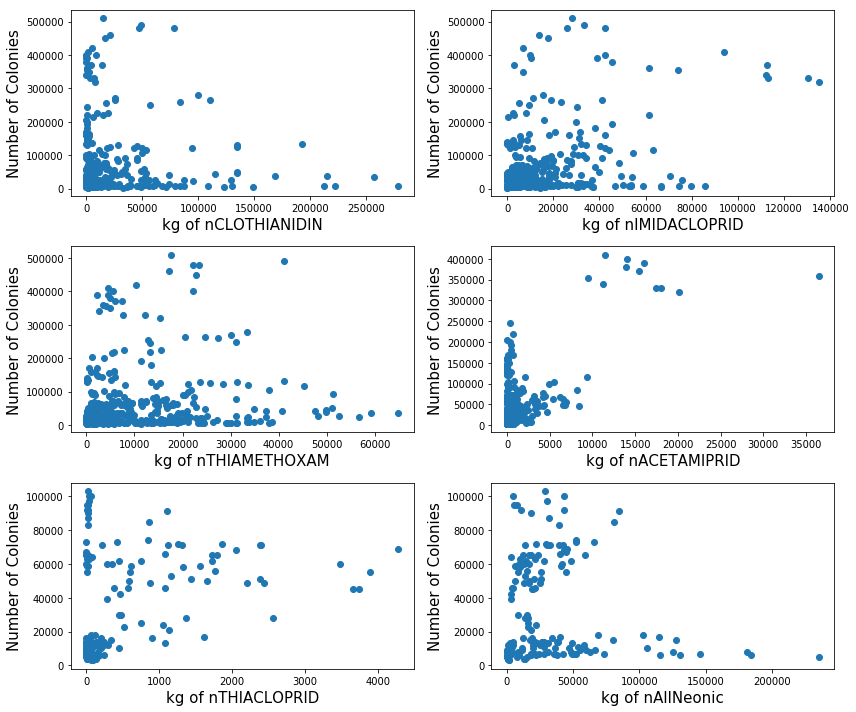

In [17]:
#Display scatterplots of pesticide usage versus number of colonies
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(12,10))

ax1.set_xlabel('kg of nCLOTHIANIDIN',fontsize=15)
ax1.set_ylabel('Number of Colonies',fontsize=15)
ax1.scatter(excludeHI_data['nCLOTHIANIDIN'],excludeHI_data['numcol'])

ax2.set_xlabel('kg of nIMIDACLOPRID',fontsize=15)
ax2.set_ylabel('Number of Colonies',fontsize=15)
ax2.scatter(excludeHI_data['nIMIDACLOPRID'],excludeHI_data['numcol'])

ax3.set_xlabel('kg of nTHIAMETHOXAM',fontsize=15)
ax3.set_ylabel('Number of Colonies',fontsize=15)
ax3.scatter(excludeHI_data['nTHIAMETHOXAM'],excludeHI_data['numcol'])

ax4.set_xlabel('kg of nACETAMIPRID',fontsize=15)
ax4.set_ylabel('Number of Colonies',fontsize=15)
ax4.scatter(nACETAMIPRID_data['nACETAMIPRID'],nACETAMIPRID_data['numcol'])

ax5.set_xlabel('kg of nTHIACLOPRID',fontsize=15)
ax5.set_ylabel('Number of Colonies',fontsize=15)
ax5.scatter(nTHIACLOPRID_data['nTHIACLOPRID'],nTHIACLOPRID_data['numcol'])

ax6.set_xlabel('kg of nAllNeonic',fontsize=15)
ax6.set_ylabel('Number of Colonies',fontsize=15)
ax6.scatter(nTHIACLOPRID_data['nAllNeonic'],nTHIACLOPRID_data['numcol'])

plt.tight_layout()
plt.show()

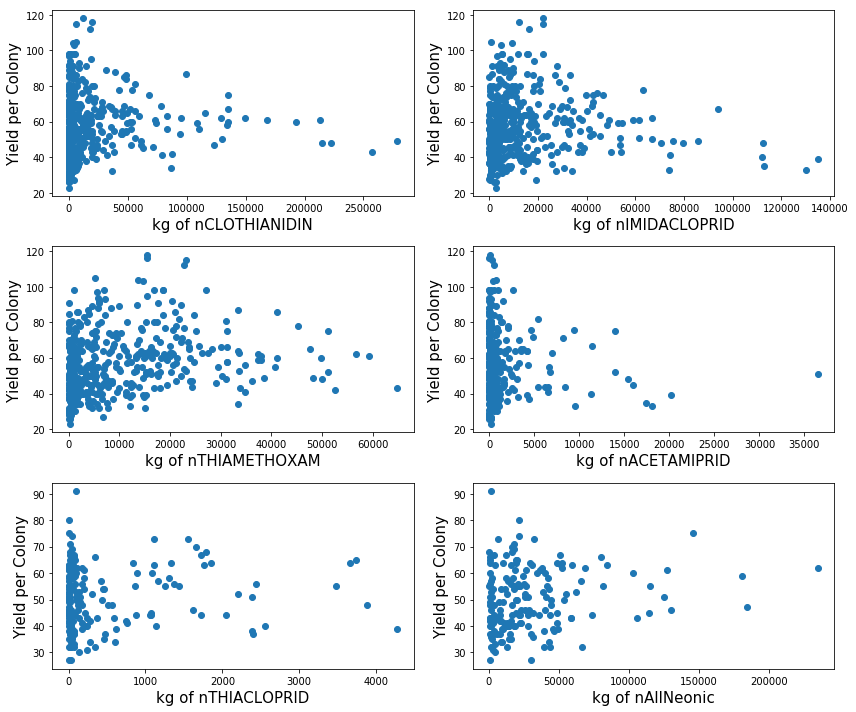

In [18]:
#Display scatterplots of pesticide usage versus Yield Per Colony
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(12,10))

ax1.set_xlabel('kg of nCLOTHIANIDIN',fontsize=15)
ax1.set_ylabel('Yield per Colony',fontsize=15)
ax1.scatter(excludeHI_data['nCLOTHIANIDIN'],excludeHI_data['yieldpercol'])

ax2.set_xlabel('kg of nIMIDACLOPRID',fontsize=15)
ax2.set_ylabel('Yield per Colony',fontsize=15)
ax2.scatter(excludeHI_data['nIMIDACLOPRID'],excludeHI_data['yieldpercol'])

ax3.set_xlabel('kg of nTHIAMETHOXAM',fontsize=15)
ax3.set_ylabel('Yield per Colony',fontsize=15)
ax3.scatter(excludeHI_data['nTHIAMETHOXAM'],excludeHI_data['yieldpercol'])

ax4.set_xlabel('kg of nACETAMIPRID',fontsize=15)
ax4.set_ylabel('Yield per Colony',fontsize=15)
ax4.scatter(nACETAMIPRID_data['nACETAMIPRID'],nACETAMIPRID_data['yieldpercol'])

ax5.set_xlabel('kg of nTHIACLOPRID',fontsize=15)
ax5.set_ylabel('Yield per Colony',fontsize=15)
ax5.scatter(nTHIACLOPRID_data['nTHIACLOPRID'],nTHIACLOPRID_data['yieldpercol'])

ax6.set_xlabel('kg of nAllNeonic',fontsize=15)
ax6.set_ylabel('Yield per Colony',fontsize=15)
ax6.scatter(nTHIACLOPRID_data['nAllNeonic'],nTHIACLOPRID_data['yieldpercol'])

plt.tight_layout()
plt.show()


C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


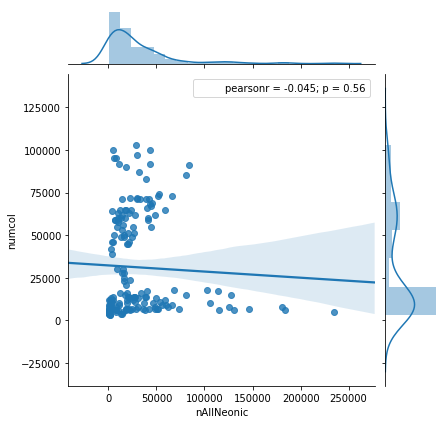

In [19]:
#Display simple regression of allneaoninc pesticide usage versus number of colonies (not normalized)
sns.jointplot("nAllNeonic", "numcol", data=nTHIACLOPRID_data, kind="reg")

In [20]:
#As the data are skewed, the data are normalized through logarithmic transformation

excludeHI_data['log_nCLOTHIANIDIN'] = np.log(excludeHI_data['nCLOTHIANIDIN']+(0.5*0.3)) #zeros
excludeHI_data['log_nIMIDACLOPRID'] = np.log(excludeHI_data['nIMIDACLOPRID'])
excludeHI_data['log_nTHIAMETHOXAM'] = np.log(excludeHI_data['nTHIAMETHOXAM'])
excludeHI_data['log_numcol'] = np.log(excludeHI_data['numcol'])
excludeHI_data['log_yieldpercol'] = np.log(excludeHI_data['yieldpercol'])

nACETAMIPRID_data['log_nACETAMIPRID'] = np.log(nACETAMIPRID_data['nACETAMIPRID']+(0.5*0.1)) #zeros
nACETAMIPRID_data['log_numcol'] = np.log(nACETAMIPRID_data['numcol'])
nACETAMIPRID_data['log_yieldpercol'] = np.log(nACETAMIPRID_data['yieldpercol'])

nTHIACLOPRID_data['log_nTHIACLOPRID']= np.log(nTHIACLOPRID_data['nTHIACLOPRID']+(0.5*0.1)) #zeros
nTHIACLOPRID_data['log_nAllNeonic'] = np.log(nTHIACLOPRID_data['nAllNeonic'])
nTHIACLOPRID_data['log_numcol'] = np.log(nTHIACLOPRID_data['numcol'])
nTHIACLOPRID_data['log_yieldpercol'] = np.log(nTHIACLOPRID_data['yieldpercol'])

C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


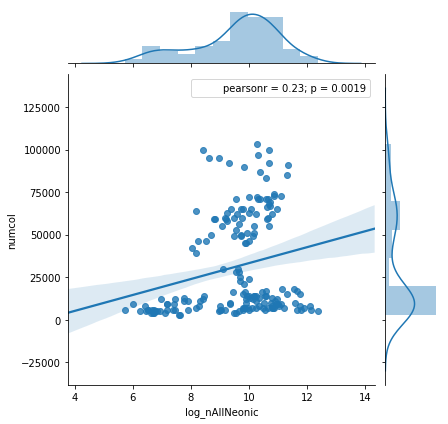

In [21]:
#Dispay simple regression of allneaoninc pesticide usage versus number of colonies (log normalized 
#allNeonic only)
sns.jointplot("log_nAllNeonic", "numcol", data=nTHIACLOPRID_data, kind="reg")

C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


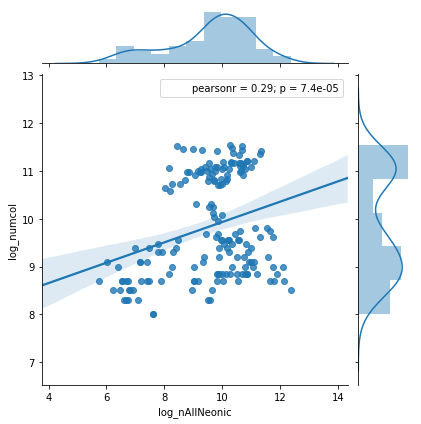

In [22]:
#Dispay simple regression of allneaoninc pesticide usage versus number of colonies (log normalized 
#allNeonic and number of colonies)
sns.jointplot("log_nAllNeonic", "log_numcol", data=nTHIACLOPRID_data, kind="reg")

C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


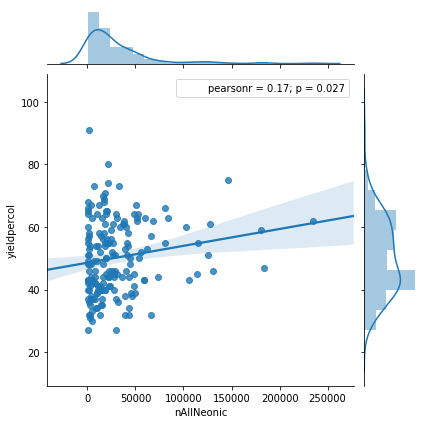

In [23]:
#Display simple regression of allneaoninc pesticide usage versus yield per colony (not normalized)
sns.jointplot("nAllNeonic", "yieldpercol", data=nTHIACLOPRID_data, kind="reg")

C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


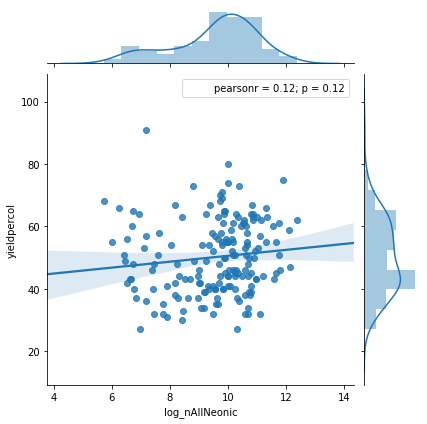

In [24]:
#Dispay simple regression of allneaoninc pesticide usage versus yield per colony (log normalized 
#allNeonic only)
sns.jointplot("log_nAllNeonic", "yieldpercol", data=nTHIACLOPRID_data, kind="reg")

C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


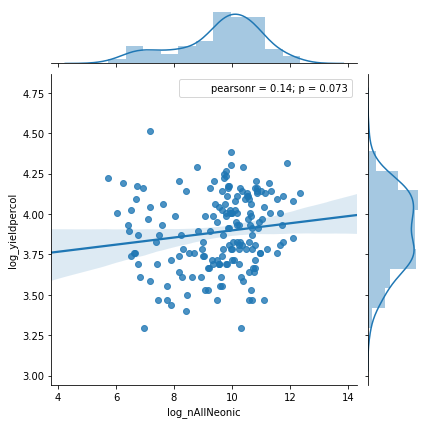

In [25]:
#Dispay simple regression of allneaoninc pesticide usage versus yield per colony (log normalized 
#allNeonic and yield per colony)
sns.jointplot("log_nAllNeonic", "log_yieldpercol", data=nTHIACLOPRID_data, kind="reg")

In [26]:
#Print the shape of the 3 datasets to be used in the regressions
print("The Honey Production Neonic Pesticide dataset excluding HI has {} data points with {} variables each.".format(*excludeHI_data.shape))
print("The Honey Production nACETAMIPRID dataset has {} data points with {} variables each.".format(*nACETAMIPRID_data.shape))
print("The Honey Production nTHIACLOPRID dataset has {} data points with {} variables each.".format(*nTHIACLOPRID_data.shape))

The Honey Production Neonic Pesticide dataset excluding HI has 432 data points with 12 variables each.
The Honey Production nACETAMIPRID dataset has 355 data points with 8 variables each.
The Honey Production nTHIACLOPRID dataset has 176 data points with 10 variables each.


In [27]:
#inspect a sample of the excludeHI_data dataset 
excludeHI_data.head()

,state,numcol,yieldpercol,year,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,log_nCLOTHIANIDIN,log_nIMIDACLOPRID,log_nTHIAMETHOXAM,log_numcol,log_yieldpercol
10,AL,12000.0,87,2004,2676.4,1323.9,3863.9,7.892284,7.188337,8.259432,9.392662,4.465908
11,AL,13000.0,66,2005,1503.6,994.5,5493.9,7.315717,6.902240,8.611394,9.472705,4.189655
8,AL,11000.0,72,2006,680.0,4230.2,5371.6,6.522313,8.350005,8.588881,9.305651,4.276666
7,AL,11000.0,56,2007,7696.2,3258.1,4149.6,8.948501,8.088899,8.330767,9.305651,4.025352
26,AL,9000.0,66,2008,1598.3,3296.6,4214.5,7.376790,8.100647,8.346286,9.104980,4.189655


In [28]:
#inspect a sample of the nACETAMIPRID_data dataset
nACETAMIPRID_data.head()

,state,numcol,yieldpercol,year,nACETAMIPRID,log_nACETAMIPRID,log_numcol,log_yieldpercol
47,AR,40000.0,57,2004,3312.4,8.105443,10.596635,4.043051
46,AR,36000.0,69,2005,981.2,6.888827,10.491274,4.234107
45,AR,32000.0,76,2006,4686.6,8.452473,10.373491,4.330733
43,AR,28000.0,80,2007,1277.4,7.152621,10.239960,4.382027
42,AR,28000.0,75,2008,995.7,6.903496,10.239960,4.317488


In [29]:
#inspect a sample of the nTHIACLOPRID_data dataset
nTHIACLOPRID_data.head()

,state,numcol,yieldpercol,year,nTHIACLOPRID,nAllNeonic,log_nTHIACLOPRID,log_nAllNeonic,log_numcol,log_yieldpercol
177,GA,63000.0,49,2004,2.7,10421.4,1.011601,9.251617,11.050890,3.891820
174,GA,59000.0,49,2005,20.6,6937.3,3.027715,8.844668,10.985293,3.891820
178,GA,63000.0,74,2006,41.4,21680.5,3.724488,9.984169,11.050890,4.304065
176,GA,60000.0,58,2007,0.0,17159.8,-2.995732,9.750325,11.002100,4.060443
182,GA,65000.0,71,2008,21.5,18027.3,3.070376,9.799643,11.082143,4.262680


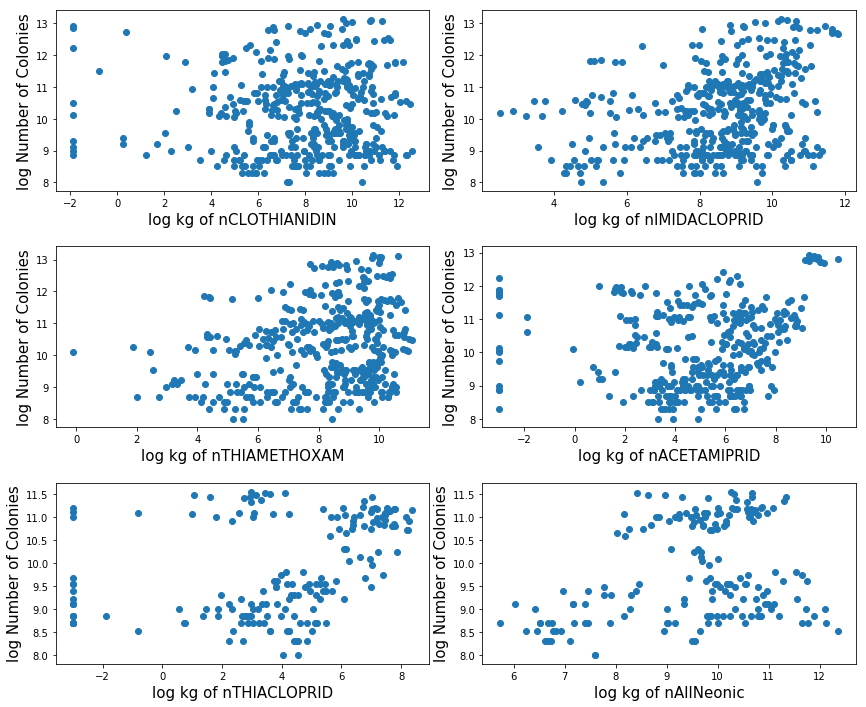

In [30]:
#Display scatterplots of the log normalized pesticide usage versus number of colonies
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(12,10))

ax1.set_xlabel('log kg of nCLOTHIANIDIN',fontsize=15)
ax1.set_ylabel('log Number of Colonies',fontsize=15)
ax1.scatter(excludeHI_data['log_nCLOTHIANIDIN'],excludeHI_data['log_numcol'])

ax2.set_xlabel('log kg of nIMIDACLOPRID',fontsize=15)
ax2.set_ylabel('log Number of Colonies',fontsize=15)
ax2.scatter(excludeHI_data['log_nIMIDACLOPRID'],excludeHI_data['log_numcol'])

ax3.set_xlabel('log kg of nTHIAMETHOXAM',fontsize=15)
ax3.set_ylabel('log Number of Colonies',fontsize=15)
ax3.scatter(excludeHI_data['log_nTHIAMETHOXAM'],excludeHI_data['log_numcol'])

ax4.set_xlabel('log kg of nACETAMIPRID',fontsize=15)
ax4.set_ylabel('log Number of Colonies',fontsize=15)
ax4.scatter(nACETAMIPRID_data['log_nACETAMIPRID'],nACETAMIPRID_data['log_numcol'])

ax5.set_xlabel('log kg of nTHIACLOPRID',fontsize=15)
ax5.set_ylabel('log Number of Colonies',fontsize=15)
ax5.scatter(nTHIACLOPRID_data['log_nTHIACLOPRID'],nTHIACLOPRID_data['log_numcol'])

ax6.set_xlabel('log kg of nAllNeonic',fontsize=15)
ax6.set_ylabel('log Number of Colonies',fontsize=15)
ax6.scatter(nTHIACLOPRID_data['log_nAllNeonic'],nTHIACLOPRID_data['log_numcol'])

plt.tight_layout()
plt.show()

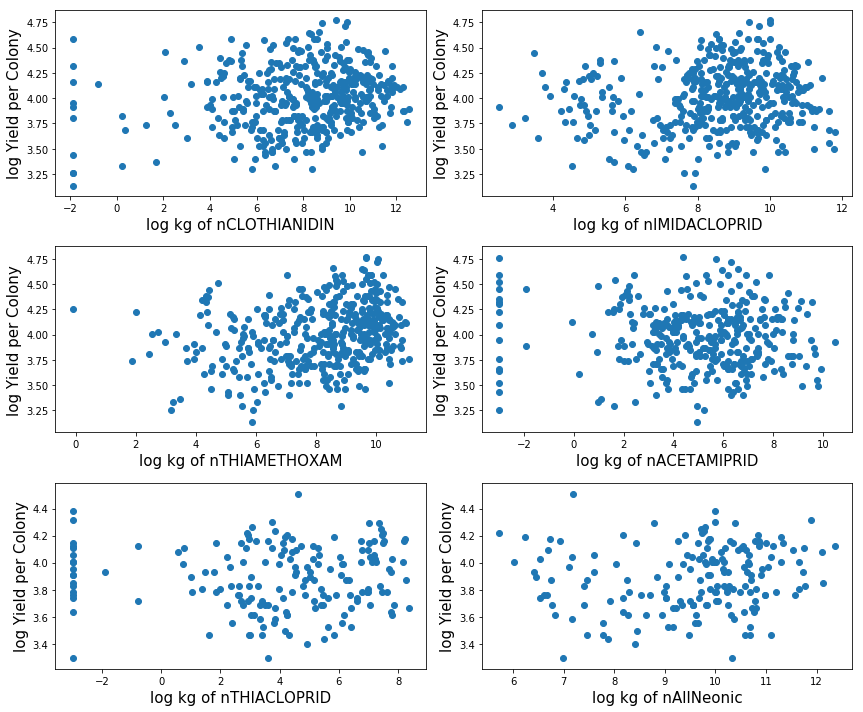

In [31]:
#Display scatterplots of the log normalized pesticide usage versus number of colonies

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(12,10))

ax1.set_xlabel('log kg of nCLOTHIANIDIN',fontsize=15)
ax1.set_ylabel('log Yield per Colony',fontsize=15)
ax1.scatter(excludeHI_data['log_nCLOTHIANIDIN'],excludeHI_data['log_yieldpercol'])

ax2.set_xlabel('log kg of nIMIDACLOPRID',fontsize=15)
ax2.set_ylabel('log Yield per Colony',fontsize=15)
ax2.scatter(excludeHI_data['log_nIMIDACLOPRID'],excludeHI_data['log_yieldpercol'])

ax3.set_xlabel('log kg of nTHIAMETHOXAM',fontsize=15)
ax3.set_ylabel('log Yield per Colony',fontsize=15)
ax3.scatter(excludeHI_data['log_nTHIAMETHOXAM'],excludeHI_data['log_yieldpercol'])

ax4.set_xlabel('log kg of nACETAMIPRID',fontsize=15)
ax4.set_ylabel('log Yield per Colony',fontsize=15)
ax4.scatter(nACETAMIPRID_data['log_nACETAMIPRID'],nACETAMIPRID_data['log_yieldpercol'])

ax5.set_xlabel('log kg of nTHIACLOPRID',fontsize=15)
ax5.set_ylabel('log Yield per Colony',fontsize=15)
ax5.scatter(nTHIACLOPRID_data['log_nTHIACLOPRID'],nTHIACLOPRID_data['log_yieldpercol'])

ax6.set_xlabel('log kg of nAllNeonic',fontsize=15)
ax6.set_ylabel('log Yield per Colony',fontsize=15)
ax6.scatter(nTHIACLOPRID_data['log_nAllNeonic'],nTHIACLOPRID_data['log_yieldpercol'])

plt.tight_layout()
plt.show()

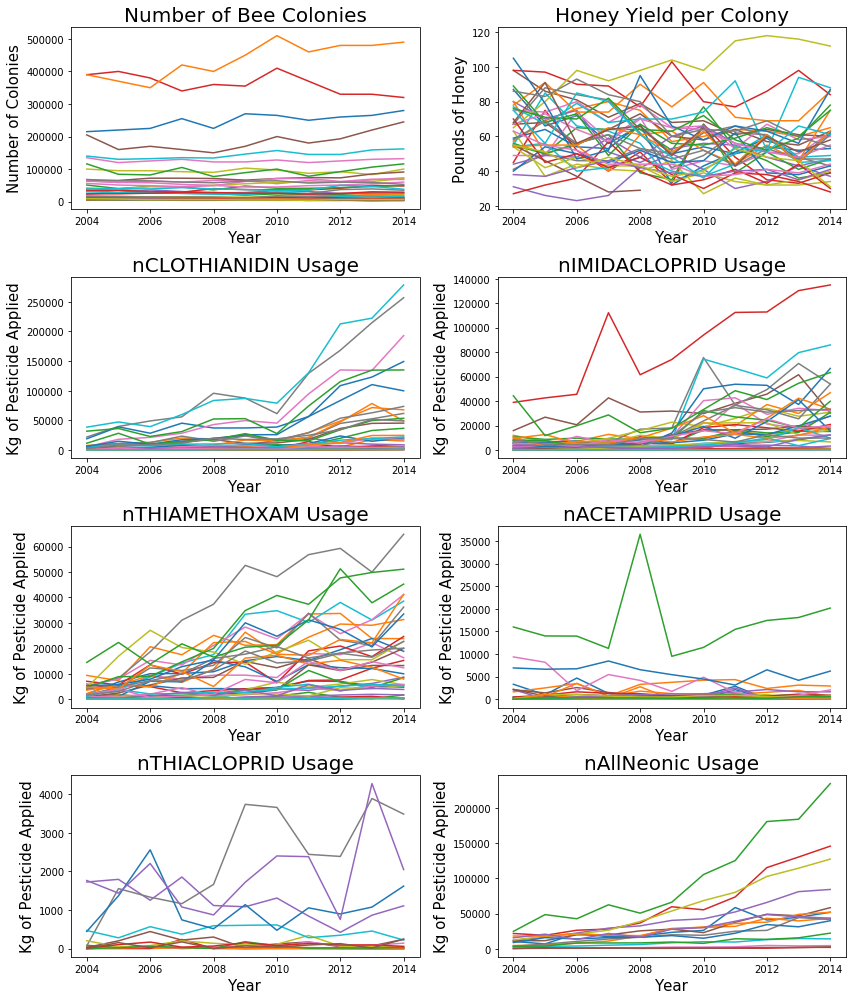

In [32]:
#display graphs of the features over the time series
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(12,14))

ax1.set_title('Number of Bee Colonies',fontsize=20)
ax1.set_xlabel('Year',fontsize=15)
ax1.set_ylabel('Number of Colonies',fontsize=15)

for i in excludeHI_data.state.unique():
    x = excludeHI_data[excludeHI_data.state==i]['year']
    y = excludeHI_data[excludeHI_data.state==i]['numcol']
    ax1.plot(x,y)

ax2.set_title('Honey Yield per Colony',fontsize=20)
ax2.set_xlabel('Year',fontsize=15)
ax2.set_ylabel('Pounds of Honey',fontsize=15)

for i in excludeHI_data.state.unique():
    x = excludeHI_data[excludeHI_data.state==i]['year']
    y = excludeHI_data[excludeHI_data.state==i]['yieldpercol']
    ax2.plot(x,y)

ax3.set_title('nCLOTHIANIDIN Usage',fontsize=20)
ax3.set_xlabel('Year',fontsize=15)
ax3.set_ylabel('Kg of Pesticide Applied',fontsize=15)

for i in excludeHI_data.state.unique():
    x = excludeHI_data[excludeHI_data.state==i]['year']
    y = excludeHI_data[excludeHI_data.state==i]['nCLOTHIANIDIN']
    ax3.plot(x,y)

ax4.set_title('nIMIDACLOPRID Usage',fontsize=20)
ax4.set_xlabel('Year',fontsize=15)
ax4.set_ylabel('Kg of Pesticide Applied',fontsize=15)

for i in excludeHI_data.state.unique():
    x = excludeHI_data[excludeHI_data.state==i]['year']
    y = excludeHI_data[excludeHI_data.state==i]['nIMIDACLOPRID']
    ax4.plot(x,y)
    
ax5.set_title('nTHIAMETHOXAM Usage',fontsize=20)
ax5.set_xlabel('Year',fontsize=15)
ax5.set_ylabel('Kg of Pesticide Applied',fontsize=15)
    
for i in excludeHI_data.state.unique():
    x = excludeHI_data[excludeHI_data.state==i]['year']
    y = excludeHI_data[excludeHI_data.state==i]['nTHIAMETHOXAM']
    ax5.plot(x,y)

ax6.set_title('nACETAMIPRID Usage',fontsize=20)
ax6.set_xlabel('Year',fontsize=15)
ax6.set_ylabel('Kg of Pesticide Applied',fontsize=15)

for i in nACETAMIPRID_data.state.unique():
    x = nACETAMIPRID_data[nACETAMIPRID_data.state==i]['year']
    y = nACETAMIPRID_data[nACETAMIPRID_data.state==i]['nACETAMIPRID']
    ax6.plot(x,y)

ax7.set_title('nTHIACLOPRID Usage',fontsize=20)
ax7.set_xlabel('Year',fontsize=15)
ax7.set_ylabel('Kg of Pesticide Applied',fontsize=15)

for i in nTHIACLOPRID_data.state.unique():
    x = nTHIACLOPRID_data[nTHIACLOPRID_data.state==i]['year']
    y = nTHIACLOPRID_data[nTHIACLOPRID_data.state==i]['nTHIACLOPRID']
    ax7.plot(x,y)

ax8.set_title('nAllNeonic Usage',fontsize=20)
ax8.set_xlabel('Year',fontsize=15)
ax8.set_ylabel('Kg of Pesticide Applied',fontsize=15)

for i in nTHIACLOPRID_data.state.unique():
    x = nTHIACLOPRID_data[nTHIACLOPRID_data.state==i]['year']
    y = nTHIACLOPRID_data[nTHIACLOPRID_data.state==i]['nAllNeonic']
    ax8.plot(x,y)
    
plt.tight_layout()
plt.show()

In [33]:
#Next we split the data into training and testing sets and stratify the splits by state to remove state bias
excludeHI_data_train, excludeHI_data_test = train_test_split(excludeHI_data, test_size=0.25, random_state=59, stratify=excludeHI_data[['state']])
nACETAMIPRID_data_train, nACETAMIPRID_data_test = train_test_split(nACETAMIPRID_data, test_size=0.25, random_state=59, stratify=nACETAMIPRID_data[['state']])
nTHIACLOPRID_data_train, nTHIACLOPRID_data_test = train_test_split(nTHIACLOPRID_data, test_size=0.25, random_state=59, stratify=nTHIACLOPRID_data[['state']])

In [34]:
#get r2 score for baseline metric
from sklearn.neighbors import KNeighborsRegressor

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train.loc[:, [ 'log_numcol']]

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test.loc[:, [ 'log_numcol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.4992100596206972


In [35]:
#Tune parameters for KNeighborsRegression
k_range = range(1,10)

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsRegression with k neighbors
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    # 3. fit the KNeighborsRegressor model with k neighbors
    regressor = knr.fit(x_train,y_train.values.ravel())

    pred=regressor.predict(x_valid)
    #print("The Honey Production Neonic Pesticide dataset has {} data points with {} variables each.".format(*df.shape))
    print(k)
    print(r2_score(y_valid,pred))

# -0.4992100596206972 no weights
# -0.4992100596206972 weights = uniform
# -0.4992100596206972 weights = distance


1
-0.4992100596206972
2
-0.4992100596206972
3
-0.4992100596206972
4
-0.4992100596206972
5
-0.4992100596206972
6
-0.4992100596206972
7
-0.4992100596206972
8
-0.4992100596206972
9
-0.4992100596206972


In [36]:
#get r2 score for baseline metric
x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']]
y_train = excludeHI_data_train.loc[:, [ 'log_numcol']]

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test.loc[:, [ 'log_numcol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.3109018628249729


In [37]:
#get r2 score for baseline metric
x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']]
y_train = excludeHI_data_train.loc[:, [ 'log_numcol']]

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test.loc[:, [ 'log_numcol']]


knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.5285724072973892


In [38]:
#get r2 score for baseline metric
x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test.loc[:, [ 'log_yieldpercol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.47737607602180776


In [39]:
#get r2 score for baseline metric
x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']]
y_train = excludeHI_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test.loc[:, [ 'log_yieldpercol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.5412830345756283


In [40]:
#get r2 score for baseline metric
x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']]
y_train = excludeHI_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test.loc[:, [ 'log_yieldpercol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.3822707232632394


In [41]:
#get r2 score for baseline metric
x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']]
y_train = nACETAMIPRID_data_train.loc[:, [ 'log_numcol']]

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test.loc[:, [ 'log_numcol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.04809638037496966


In [42]:
#get r2 score for baseline metric
x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']]
y_train = nACETAMIPRID_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test.loc[:, [ 'log_yieldpercol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.3391144044004515


In [43]:
#get r2 score for baseline metric
x_train = nTHIACLOPRID_data.loc[:, ['log_nAllNeonic']]
y_train = nTHIACLOPRID_data.loc[:, [ 'log_numcol']]

x_valid = nTHIACLOPRID_data.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data.loc[:, [ 'log_numcol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


0.6170393423682657


In [44]:
#get r2 score for baseline metric
x_train = nTHIACLOPRID_data.loc[:, ['log_nTHIACLOPRID']]
y_train = nTHIACLOPRID_data.loc[:, [ 'log_numcol']]

x_valid = nTHIACLOPRID_data.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data.loc[:, [ 'log_numcol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


0.3822430828342518


In [45]:
#get r2 score for baseline metric
x_train = nTHIACLOPRID_data.loc[:, ['log_nTHIACLOPRID']]
y_train = nTHIACLOPRID_data.loc[:, [ 'log_yieldpercol']]

x_valid = nTHIACLOPRID_data.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data.loc[:, [ 'log_yieldpercol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


0.43179206807055226


In [46]:
#get r2 score for baseline metric
x_train = nTHIACLOPRID_data.loc[:, ['log_nAllNeonic']]
y_train = nTHIACLOPRID_data.loc[:, [ 'log_yieldpercol']]

x_valid = nTHIACLOPRID_data.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data.loc[:, [ 'log_yieldpercol']]

knr = KNeighborsRegressor(n_neighbors=2)

regressor = knr.fit(x_train,y_train.values.ravel())

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


0.5746861957903846


In [47]:
#Get r2 score of DecisionTreeRegressor metric

from sklearn.tree import DecisionTreeRegressor

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train.loc[:, [ 'log_numcol']]

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test.loc[:, [ 'log_numcol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.9205274907331262


In [48]:
#Get r2 score of DecisionTreeRegressor metric
#Tune DecisionTreeRegressor parameters
k_range = range(1,10)

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run DecisionTreeRegressor with k neighbors
    regressor = DecisionTreeRegressor(random_state=k, splitter='best', criterion='mae')
    # 3. fit the DecisionTreeRegressor model with k neighbors
    regressor = knr.fit(x_train,y_train.values.ravel())

    pred=regressor.predict(x_valid)
    #print("The Honey Production Neonic Pesticide dataset has {} data points with {} variables each.".format(*df.shape))
    print(k)
    print(r2_score(y_valid,pred))

# -0.8067318812537008 random states 1 through 10, splitter = best, criterion='mse', splitter = 'best'
# -0.8067318812537008 random states 1 through 10, splitter = random, criterion='mse', splitter = random
# -0.8067318812537008 random states 1 through 10, splitter = best, criterion='friedman_mse', splitter = 'best'
# -0.8067318812537008 random states 1 through 10, splitter = best, criterion='mae', splitter = 'best'


1
-0.4992100596206972
2
-0.4992100596206972
3
-0.4992100596206972
4
-0.4992100596206972
5
-0.4992100596206972
6
-0.4992100596206972
7
-0.4992100596206972
8
-0.4992100596206972
9
-0.4992100596206972


In [49]:
#Get r2 score of DecisionTreeRegressor metric
x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']] 
y_train = excludeHI_data_train.loc[:, [ 'log_numcol']]

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test.loc[:, [ 'log_numcol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.7807793045061457


In [50]:
#Get r2 score of DecisionTreeRegressor metric
x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']] 
y_train = excludeHI_data_train.loc[:, [ 'log_numcol']]

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test.loc[:, [ 'log_numcol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-1.119874801468153


In [51]:
#Get r2 score of DecisionTreeRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test.loc[:, [ 'log_yieldpercol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.7178347304902533


In [52]:
#Get r2 score of DecisionTreeRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']] 
y_train = excludeHI_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test.loc[:, [ 'log_yieldpercol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-1.1215407270707356


In [53]:
#Get r2 score of DecisionTreeRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']] 
y_train = excludeHI_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test.loc[:, [ 'log_yieldpercol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.8624640031526354


In [54]:
#Get r2 score of DecisionTreeRegressor metric

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train.loc[:, [ 'log_numcol']]

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test.loc[:, [ 'log_numcol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.5424097975436348


In [55]:
#Get r2 score of DecisionTreeRegressor metric

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test.loc[:, [ 'log_yieldpercol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-1.014427080782688


In [56]:
#Get r2 score of DecisionTreeRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nTHIACLOPRID']] 
y_train = nTHIACLOPRID_data_train.loc[:, [ 'log_numcol']]

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data_test.loc[:, [ 'log_numcol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.21191223067635256


In [57]:
#Get r2 score of DecisionTreeRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nAllNeonic']] 
y_train = nTHIACLOPRID_data_train.loc[:, [ 'log_numcol']]

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data_test.loc[:, [ 'log_numcol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.49312502013696013


In [58]:
#Get r2 score of DecisionTreeRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nTHIACLOPRID']] 
y_train = nTHIACLOPRID_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data_test.loc[:, [ 'log_yieldpercol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-1.3851486022979644


In [59]:
#Get r2 score of DecisionTreeRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nAllNeonic']] 
y_train = nTHIACLOPRID_data_train.loc[:, [ 'log_yieldpercol']]

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data_test.loc[:, [ 'log_yieldpercol']]

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

pred=regressor.predict(x_valid)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


-0.46035464314202756


In [60]:
#Get r2 score of lightGBM metric

import lightgbm as lgb

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train['log_numcol']

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test['log_numcol']


lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))

#-0.08708986119127737 boosting type 'rf' 
#-0.002234109800022255 boosting type 'gbdt' numleaves = 31 learning rate = .05
#-0.002234109800022255 boosting type 'gbdt' numleaves = 10 learning rate = .05
#-0.000825042194555480 boosting type 'gbdt' numleaves = 10 learning rate = .01

Starting training...
[1]	valid_0's l2: 1.51895	valid_0's l1: 1.03414
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.51825	valid_0's l1: 1.03378
[3]	valid_0's l2: 1.51757	valid_0's l1: 1.03348
[4]	valid_0's l2: 1.51691	valid_0's l1: 1.0332
[5]	valid_0's l2: 1.51627	valid_0's l1: 1.03292
[6]	valid_0's l2: 1.51671	valid_0's l1: 1.03272
[7]	valid_0's l2: 1.51716	valid_0's l1: 1.03254
[8]	valid_0's l2: 1.51763	valid_0's l1: 1.03235
[9]	valid_0's l2: 1.51811	valid_0's l1: 1.03216
[10]	valid_0's l2: 1.51861	valid_0's l1: 1.03198
Early stopping, best iteration is:
[5]	valid_0's l2: 1.51627	valid_0's l1: 1.03292
Saving model...
Starting predicting...
0.002192813462289611


In [61]:
#Get r2 score of lightGBM metric

x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']] 
y_train = excludeHI_data_train['log_numcol']

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test['log_numcol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))

Starting training...
[1]	valid_0's l2: 1.50398	valid_0's l1: 1.02997
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.48869	valid_0's l1: 1.02495
[3]	valid_0's l2: 1.47654	valid_0's l1: 1.02138
[4]	valid_0's l2: 1.46546	valid_0's l1: 1.01899
[5]	valid_0's l2: 1.45636	valid_0's l1: 1.01598
[6]	valid_0's l2: 1.45134	valid_0's l1: 1.01514
[7]	valid_0's l2: 1.44734	valid_0's l1: 1.01477
[8]	valid_0's l2: 1.44425	valid_0's l1: 1.01454
[9]	valid_0's l2: 1.44023	valid_0's l1: 1.01425
[10]	valid_0's l2: 1.43868	valid_0's l1: 1.01408
[11]	valid_0's l2: 1.42892	valid_0's l1: 1.0114
[12]	valid_0's l2: 1.41958	valid_0's l1: 1.00855
[13]	valid_0's l2: 1.41184	valid_0's l1: 1.00621
[14]	valid_0's l2: 1.40503	valid_0's l1: 1.004
[15]	valid_0's l2: 1.39898	valid_0's l1: 1.0019
[16]	valid_0's l2: 1.39996	valid_0's l1: 1.00215
[17]	valid_0's l2: 1.40124	valid_0's l1: 1.00208
[18]	valid_0's l2: 1.40297	valid_0's l1: 1.00201
[19]	valid_0's l2: 1.40468	valid_0's l1: 1.00161


In [62]:
#Get r2 score of lightGBM metric

x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']] 
y_train = excludeHI_data_train['log_numcol']

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test['log_numcol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))

Starting training...
[1]	valid_0's l2: 1.50835	valid_0's l1: 1.03095
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.49877	valid_0's l1: 1.02783
[3]	valid_0's l2: 1.49074	valid_0's l1: 1.02573
[4]	valid_0's l2: 1.48541	valid_0's l1: 1.02524
[5]	valid_0's l2: 1.47991	valid_0's l1: 1.02498
[6]	valid_0's l2: 1.47648	valid_0's l1: 1.02556
[7]	valid_0's l2: 1.47382	valid_0's l1: 1.02634
[8]	valid_0's l2: 1.47156	valid_0's l1: 1.02707
[9]	valid_0's l2: 1.46989	valid_0's l1: 1.02777
[10]	valid_0's l2: 1.46873	valid_0's l1: 1.02843
Early stopping, best iteration is:
[5]	valid_0's l2: 1.47991	valid_0's l1: 1.02498
Saving model...
Starting predicting...
0.026118548341682146


In [63]:
#Get r2 score of lightGBM metric

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train['log_yieldpercol']

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test['log_yieldpercol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.0872504	valid_0's l1: 0.236919
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0875342	valid_0's l1: 0.237448
[3]	valid_0's l2: 0.0878227	valid_0's l1: 0.237891
[4]	valid_0's l2: 0.0879963	valid_0's l1: 0.238183
[5]	valid_0's l2: 0.0883262	valid_0's l1: 0.238674
[6]	valid_0's l2: 0.0887387	valid_0's l1: 0.239245
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0872504	valid_0's l1: 0.236919
Saving model...
Starting predicting...
-0.004258603516758441


In [64]:
#Get r2 score of lightGBM metric

x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']] 
y_train = excludeHI_data_train['log_yieldpercol']

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test['log_yieldpercol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.0866806	valid_0's l1: 0.235561
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0863922	valid_0's l1: 0.234678
[3]	valid_0's l2: 0.0861559	valid_0's l1: 0.233847
[4]	valid_0's l2: 0.0859654	valid_0's l1: 0.233057
[5]	valid_0's l2: 0.0858151	valid_0's l1: 0.232439
[6]	valid_0's l2: 0.0855351	valid_0's l1: 0.231543
[7]	valid_0's l2: 0.0852715	valid_0's l1: 0.230719
[8]	valid_0's l2: 0.085053	valid_0's l1: 0.230062
[9]	valid_0's l2: 0.0848742	valid_0's l1: 0.229437
[10]	valid_0's l2: 0.0848794	valid_0's l1: 0.229065
[11]	valid_0's l2: 0.0847215	valid_0's l1: 0.228677
[12]	valid_0's l2: 0.0846208	valid_0's l1: 0.228546
[13]	valid_0's l2: 0.0845493	valid_0's l1: 0.228425
[14]	valid_0's l2: 0.0845358	valid_0's l1: 0.228452
[15]	valid_0's l2: 0.084554	valid_0's l1: 0.228528
[16]	valid_0's l2: 0.0848576	valid_0's l1: 0.228939
[17]	valid_0's l2: 0.0851764	valid_0's l1: 0.229365
[18]	valid_0's l2: 0.0855067	valid_0's l1: 0.

In [65]:
#Get r2 score of lightGBM metric

x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']] 
y_train = excludeHI_data_train['log_yieldpercol']

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test['log_yieldpercol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.0865754	valid_0's l1: 0.236094
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0861884	valid_0's l1: 0.235588
[3]	valid_0's l2: 0.0859936	valid_0's l1: 0.235397
[4]	valid_0's l2: 0.0858327	valid_0's l1: 0.235417
[5]	valid_0's l2: 0.0857659	valid_0's l1: 0.235436
[6]	valid_0's l2: 0.0855645	valid_0's l1: 0.235214
[7]	valid_0's l2: 0.0854379	valid_0's l1: 0.235217
[8]	valid_0's l2: 0.0854497	valid_0's l1: 0.235389
[9]	valid_0's l2: 0.0854415	valid_0's l1: 0.23578
[10]	valid_0's l2: 0.0855546	valid_0's l1: 0.236145
[11]	valid_0's l2: 0.0855972	valid_0's l1: 0.23636
Early stopping, best iteration is:
[6]	valid_0's l2: 0.0855645	valid_0's l1: 0.235214
Saving model...
Starting predicting...
0.015146933623936487


In [66]:
#Get r2 score of lightGBM metric

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train['log_numcol']

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test['log_numcol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 1.37293	valid_0's l1: 0.990385
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.3517	valid_0's l1: 0.983269
[3]	valid_0's l2: 1.33111	valid_0's l1: 0.975522
[4]	valid_0's l2: 1.31278	valid_0's l1: 0.969626
[5]	valid_0's l2: 1.29648	valid_0's l1: 0.964024
[6]	valid_0's l2: 1.28421	valid_0's l1: 0.958905
[7]	valid_0's l2: 1.26913	valid_0's l1: 0.952857
[8]	valid_0's l2: 1.25912	valid_0's l1: 0.947762
[9]	valid_0's l2: 1.25161	valid_0's l1: 0.944034
[10]	valid_0's l2: 1.24425	valid_0's l1: 0.939466
[11]	valid_0's l2: 1.23129	valid_0's l1: 0.934018
[12]	valid_0's l2: 1.21958	valid_0's l1: 0.92912
[13]	valid_0's l2: 1.20839	valid_0's l1: 0.923724
[14]	valid_0's l2: 1.19828	valid_0's l1: 0.919821
[15]	valid_0's l2: 1.18984	valid_0's l1: 0.916834
[16]	valid_0's l2: 1.18508	valid_0's l1: 0.915451
[17]	valid_0's l2: 1.18002	valid_0's l1: 0.913687
[18]	valid_0's l2: 1.17664	valid_0's l1: 0.912451
[19]	valid_0's l2: 1.17382	va

In [67]:
#Get r2 score of lightGBM metric

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train['log_yieldpercol']

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test['log_yieldpercol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.0936994	valid_0's l1: 0.249371
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0934844	valid_0's l1: 0.249011
[3]	valid_0's l2: 0.0933007	valid_0's l1: 0.248669
[4]	valid_0's l2: 0.0931447	valid_0's l1: 0.248363
[5]	valid_0's l2: 0.0930133	valid_0's l1: 0.248162
[6]	valid_0's l2: 0.0930763	valid_0's l1: 0.248388
[7]	valid_0's l2: 0.0931557	valid_0's l1: 0.248603
[8]	valid_0's l2: 0.0932488	valid_0's l1: 0.248808
[9]	valid_0's l2: 0.0932774	valid_0's l1: 0.248886
[10]	valid_0's l2: 0.0933798	valid_0's l1: 0.249142
Early stopping, best iteration is:
[5]	valid_0's l2: 0.0930133	valid_0's l1: 0.248162
Saving model...
Starting predicting...
0.008409942681212201


In [68]:
#Get r2 score of lightGBM metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nTHIACLOPRID']] 
y_train = nTHIACLOPRID_data_train['log_numcol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data_test['log_numcol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.989704	valid_0's l1: 0.891253
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.957158	valid_0's l1: 0.870699
[3]	valid_0's l2: 0.927988	valid_0's l1: 0.851172
[4]	valid_0's l2: 0.901854	valid_0's l1: 0.832621
[5]	valid_0's l2: 0.878451	valid_0's l1: 0.815258
[6]	valid_0's l2: 0.859049	valid_0's l1: 0.80291
[7]	valid_0's l2: 0.840538	valid_0's l1: 0.789506
[8]	valid_0's l2: 0.82499	valid_0's l1: 0.778739
[9]	valid_0's l2: 0.811357	valid_0's l1: 0.769878
[10]	valid_0's l2: 0.7986	valid_0's l1: 0.760973
[11]	valid_0's l2: 0.788175	valid_0's l1: 0.752642
[12]	valid_0's l2: 0.77857	valid_0's l1: 0.744791
[13]	valid_0's l2: 0.769962	valid_0's l1: 0.73828
[14]	valid_0's l2: 0.761458	valid_0's l1: 0.732162
[15]	valid_0's l2: 0.754316	valid_0's l1: 0.726591
[16]	valid_0's l2: 0.747288	valid_0's l1: 0.721657
[17]	valid_0's l2: 0.741019	valid_0's l1: 0.71697
[18]	valid_0's l2: 0.733788	valid_0's l1: 0.711818
[19]	valid_0's l

In [69]:
#Get r2 score of lightGBM metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nAllNeonic']] 
y_train = nTHIACLOPRID_data_train['log_numcol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data_test['log_numcol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 1.01124	valid_0's l1: 0.908336
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.998377	valid_0's l1: 0.90401
[3]	valid_0's l2: 0.987203	valid_0's l1: 0.8999
[4]	valid_0's l2: 0.980886	valid_0's l1: 0.897093
[5]	valid_0's l2: 0.972612	valid_0's l1: 0.893351
[6]	valid_0's l2: 0.960547	valid_0's l1: 0.889665
[7]	valid_0's l2: 0.950128	valid_0's l1: 0.886163
[8]	valid_0's l2: 0.94117	valid_0's l1: 0.882837
[9]	valid_0's l2: 0.933509	valid_0's l1: 0.879677
[10]	valid_0's l2: 0.926997	valid_0's l1: 0.876674
[11]	valid_0's l2: 0.917083	valid_0's l1: 0.870494
[12]	valid_0's l2: 0.906134	valid_0's l1: 0.863995
[13]	valid_0's l2: 0.896249	valid_0's l1: 0.857821
[14]	valid_0's l2: 0.887323	valid_0's l1: 0.851956
[15]	valid_0's l2: 0.879264	valid_0's l1: 0.846384
[16]	valid_0's l2: 0.878454	valid_0's l1: 0.844562
[17]	valid_0's l2: 0.879797	valid_0's l1: 0.843558
[18]	valid_0's l2: 0.87965	valid_0's l1: 0.84153
[19]	valid_0's l

In [70]:
#Get r2 score of lightGBM metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nTHIACLOPRID']] 
y_train = nTHIACLOPRID_data_train['log_yieldpercol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data_test['log_yieldpercol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.0486696	valid_0's l1: 0.189879
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0487298	valid_0's l1: 0.189489
[3]	valid_0's l2: 0.0488969	valid_0's l1: 0.189458
[4]	valid_0's l2: 0.048965	valid_0's l1: 0.189093
[5]	valid_0's l2: 0.0491383	valid_0's l1: 0.189075
[6]	valid_0's l2: 0.0490248	valid_0's l1: 0.188777
Early stopping, best iteration is:
[1]	valid_0's l2: 0.0486696	valid_0's l1: 0.189879
Saving model...
Starting predicting...
-0.04180853946645691


In [71]:
#Get r2 score of lightGBM metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nAllNeonic']] 
y_train = nTHIACLOPRID_data_train['log_yieldpercol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data_test['log_yieldpercol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)

#CHECK THE ACCURACY

print(r2_score(y_valid,pred))


Starting training...
[1]	valid_0's l2: 0.0477581	valid_0's l1: 0.188906
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0469891	valid_0's l1: 0.18759
[3]	valid_0's l2: 0.0463032	valid_0's l1: 0.186341
[4]	valid_0's l2: 0.0456919	valid_0's l1: 0.185154
[5]	valid_0's l2: 0.0451476	valid_0's l1: 0.184026
[6]	valid_0's l2: 0.044853	valid_0's l1: 0.183479
[7]	valid_0's l2: 0.0445985	valid_0's l1: 0.18296
[8]	valid_0's l2: 0.0443795	valid_0's l1: 0.182577
[9]	valid_0's l2: 0.0441921	valid_0's l1: 0.182363
[10]	valid_0's l2: 0.0440326	valid_0's l1: 0.182191
[11]	valid_0's l2: 0.0437547	valid_0's l1: 0.181765
[12]	valid_0's l2: 0.0435383	valid_0's l1: 0.181471
[13]	valid_0's l2: 0.0432499	valid_0's l1: 0.180971
[14]	valid_0's l2: 0.0430336	valid_0's l1: 0.180612
[15]	valid_0's l2: 0.0427824	valid_0's l1: 0.180155
[16]	valid_0's l2: 0.0426914	valid_0's l1: 0.180131
[17]	valid_0's l2: 0.0426142	valid_0's l1: 0.180108
[18]	valid_0's l2: 0.042549	valid_0's l1: 0.18

In [72]:
#Get r2 score of SupportVectorRegressor metric and tune

from sklearn.svm import SVR

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train['log_numcol']

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test['log_numcol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))

#linear=-0.14253744220411013
#rbf=-0.14343232043819887
#sigmoid=-0.14342992160542112

-0.001790116999850433


In [73]:
#Get r2 score of SupportVectorRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']] 
y_train = excludeHI_data_train['log_numcol']

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test['log_numcol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))



0.06464130302723314


In [74]:
#Get r2 score of SupportVectorRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']] 
y_train = excludeHI_data_train['log_numcol']

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test['log_numcol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))



0.043099155277408596


In [75]:
#Get r2 score of SupportVectorRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nCLOTHIANIDIN']] 
y_train = excludeHI_data_train['log_yieldpercol']

x_valid = excludeHI_data_test.loc[:, ['log_nCLOTHIANIDIN']]
y_valid = excludeHI_data_test['log_yieldpercol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))

#linear -2234308.353
#rbf=-0.14853592930665815
#sigmoid=-0.038084756195917

-0.028207079664167356


In [76]:
#Get r2 score of SupportVectorRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nIMIDACLOPRID']] 
y_train = excludeHI_data_train['log_yieldpercol']

x_valid = excludeHI_data_test.loc[:, ['log_nIMIDACLOPRID']]
y_valid = excludeHI_data_test['log_yieldpercol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


-0.013310210493287178


In [77]:
#Get r2 score of SupportVectorRegressor metric

x_train = excludeHI_data_train.loc[:, ['log_nTHIAMETHOXAM']] 
y_train = excludeHI_data_train['log_yieldpercol']

x_valid = excludeHI_data_test.loc[:, ['log_nTHIAMETHOXAM']]
y_valid = excludeHI_data_test['log_yieldpercol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


0.002947265820560485


In [78]:
#Get r2 score of SupportVectorRegressor metric

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train['log_numcol']

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test['log_numcol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


-0.04979146567008974


In [79]:
#Get r2 score of SupportVectorRegressor metric

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train['log_yieldpercol']

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test['log_yieldpercol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


-0.007053851671553257


In [80]:
#Get r2 score of SupportVectorRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nTHIACLOPRID']] 
y_train = nTHIACLOPRID_data_train['log_numcol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data_test['log_numcol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


0.04891194156681267


In [81]:
#Get r2 score of SupportVectorRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nAllNeonic']] 
y_train = nTHIACLOPRID_data_train['log_numcol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data_test['log_numcol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


-0.04699054588208518


In [82]:
#Get r2 score of SupportVectorRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nTHIACLOPRID']] 
y_train = nTHIACLOPRID_data_train['log_yieldpercol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nTHIACLOPRID']]
y_valid = nTHIACLOPRID_data_test['log_yieldpercol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


-0.028891218917942885


In [83]:
#Get r2 score of SupportVectorRegressor metric

x_train = nTHIACLOPRID_data_train.loc[:, ['log_nAllNeonic']] 
y_train = nTHIACLOPRID_data_train['log_yieldpercol']

x_valid = nTHIACLOPRID_data_test.loc[:, ['log_nAllNeonic']]
y_valid = nTHIACLOPRID_data_test['log_yieldpercol']

#Set the kernel and parameters
#regressor = SVR(kernel='linear', C=1e3)
#regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)
regressor = SVR(kernel='linear')

regressor.fit(x_train,y_train)

#CHECK THE ACCURACY

print(r2_score(y_valid,regressor.predict(x_valid)))


-0.015254387932466473


In [84]:
#Create dataset to use for the sensitivity analysis
nACETAMIPRID_data=nACETAMIPRID_data[(nACETAMIPRID_data['state'] == 'IL')]

In [85]:
#Display the data to be used for the sensitivity analysis
display(HTML(nACETAMIPRID_data.to_html()))

,state,numcol,yieldpercol,year,nACETAMIPRID,log_nACETAMIPRID,log_numcol,log_yieldpercol
283,IL,7000.0,55,2004,456.9,6.124574,8.853665,4.007333
291,IL,8000.0,85,2005,74.2,4.307438,8.987197,4.442651
278,IL,10000.0,66,2006,74.9,4.316821,9.210340,4.189655
293,IL,9000.0,63,2007,73.1,4.292512,9.104980,4.143135
289,IL,8000.0,56,2008,24.9,3.216874,8.987197,4.025352
286,IL,8000.0,34,2009,123.2,4.814215,8.987197,3.526361
292,IL,9000.0,41,2010,24.5,3.200712,9.104980,3.713572
282,IL,7000.0,50,2011,98.2,4.587515,8.853665,3.912023
285,IL,7000.0,61,2012,152.7,5.028803,8.853665,4.110874
281,IL,7000.0,48,2013,178.9,5.187106,8.853665,3.871201


In [86]:
#output the dataset to an excel file
#nACETAMIPRID_data.to_csv('sensitivity.csv')

In [87]:
#Sensitivity Analysis

import lightgbm as lgb

x_train = nACETAMIPRID_data_train.loc[:, ['log_nACETAMIPRID']] 
y_train = nACETAMIPRID_data_train['log_numcol']

x_valid = nACETAMIPRID_data_test.loc[:, ['log_nACETAMIPRID']]
y_valid = nACETAMIPRID_data_test['log_numcol']

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict

pred = gbm.predict(6.124573976, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(4.307437778, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(4.316821225, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(4.292512127, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(3.216873822, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(4.814214813, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(3.200711854, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(4.587515251, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(5.028802598, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(5.187106437, num_iteration=gbm.best_iteration)
print(np.exp(pred))
pred = gbm.predict(4.523417684, num_iteration=gbm.best_iteration)
print(np.exp(pred))

#CHECK THE ACCURACY

print(np.exp(pred))


Starting training...
[1]	valid_0's l2: 1.37293	valid_0's l1: 0.990385
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.3517	valid_0's l1: 0.983269
[3]	valid_0's l2: 1.33111	valid_0's l1: 0.975522
[4]	valid_0's l2: 1.31278	valid_0's l1: 0.969626
[5]	valid_0's l2: 1.29648	valid_0's l1: 0.964024
[6]	valid_0's l2: 1.28421	valid_0's l1: 0.958905
[7]	valid_0's l2: 1.26913	valid_0's l1: 0.952857
[8]	valid_0's l2: 1.25912	valid_0's l1: 0.947762
[9]	valid_0's l2: 1.25161	valid_0's l1: 0.944034
[10]	valid_0's l2: 1.24425	valid_0's l1: 0.939466
[11]	valid_0's l2: 1.23129	valid_0's l1: 0.934018
[12]	valid_0's l2: 1.21958	valid_0's l1: 0.92912
[13]	valid_0's l2: 1.20839	valid_0's l1: 0.923724
[14]	valid_0's l2: 1.19828	valid_0's l1: 0.919821
[15]	valid_0's l2: 1.18984	valid_0's l1: 0.916834
[16]	valid_0's l2: 1.18508	valid_0's l1: 0.915451
[17]	valid_0's l2: 1.18002	valid_0's l1: 0.913687
[18]	valid_0's l2: 1.17664	valid_0's l1: 0.912451
[19]	valid_0's l2: 1.17382	va

C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')
C:\Users\MR2328\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:450: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sp